### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: December 7, 6pm**
BEFORE the beginning of class at 6:00pm
NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team is now equipped with the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.
* NOTE, as opposed to the first three case studies, case study 4 is much more open ended.  
  * Business is the focus
  * All three parts need to appear (Business, Computer Science, and Math)
  * However, the precise balance is up to you.

# Background about Elevator Pitch (90 seconds) and Shark Tank

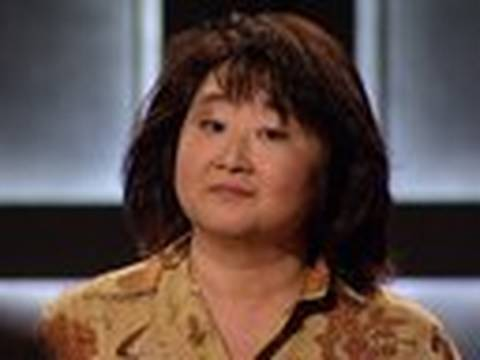

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

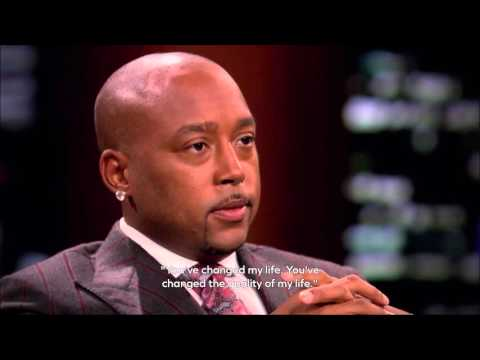

In [2]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on.
Pick one of the markets for further consideration, and design a new service  which you believe to be important in the market. 
Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe you could make a big difference with data science technology.
How are you planing to persuade the investors to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:

Our business proposition is to build a model that would provide a novel view for feature engineering. We tested our model with Web Traffic Prediction data sets from Kaggle.

2) Why the problem is important to solve? 

It really makes sence. Graphs and networks of the sophisticated systems can bring advances to people’s understanding of complex systems and interactions within them. 

3) What is your idea to solve the problem? 

We propose a combination model of graph lasso and matrix tri-factorization with some constraints. We consider it as a derivative model of Graph Lasso, and call it NMFGL. NMF means non-negative matrix factorization, because we refer the idea and algorithm of it. GL means graph lasso.

4) What differences you could make with your data science approach?

This is an unsupervised machine learning method. It can discover nodes and edges of web traffic network collectively. We show that this model works well in controlled experiments with synthetic networks and be able to recover the underlying real data network.


5) Why do you believe the idea deserves the investment of the "sharks"?

When we got 1000 features and just one thing to predict, it will cost a lot on fearture engineering process. Our model provides a novel perspective that could find the underlying relations between features and the dependent variable. After testing with the Web Traffic data set, we found our model perform reliably.




### Problem 2: The Math Part (20 points)

Define the business problem as a math problem and design a math solution to the problem.


**Insert your answers here**


1) Problem formulation in Math:




2) Math Solution:






3) Implementation of the Solution


NMFGL.py : Define the model of NMF plus Graphic Lasso

In [2]:
# your code here
from abc import ABCMeta,abstractmethod
import numpy as np
from sklearn.covariance import graph_lasso
from sklearn.cluster import spectral_clustering,SpectralClustering
import time

"""
NMF plus GL algorithm
:emp_env:S
:H prior:cluster indicator prior
:theta prior:prec estimator prior
:H threshold:prec threshold
:theta threshold:prec threshold
:param iterations:max interations
:return:local optimal of parameters
"""
class expModel(object):
    __meta__ = ABCMeta
    
    def __init__(self,name,desc=""):
        self.name = name
        self.desc = desc
    
    @abstractmethod
    def predict(self,data):
        return
    
    def clean(self):
        self._clf = None
        return

##################################################################################################
class NMFplusGL(expModel):
    name = "NMFGL"
    desc = "NMF plus GL"
    category = "coherent"
    
    def __init__(self,n_cluster,_lambda,clus_threshold,assign_labels,random_state=1991):
        super(NMFplusGL,self).__init__('NMFGL','NMF plus GL')
        self.n_cluster = n_cluster
        self._lambda = _lambda
        self.clus_threshold = clus_threshold
        self.assign_labels = assign_labels
        self.model_seed = random_state
        
    def predict(self,data):
        S = np.cov(data.transpose())
        #theta_threshold = self.prec_threshold
        H_threshold = self.clus_threshold
        sc = SpectralClustering(n_clusters=self.n_cluster,
                                assign_labels = "kmeans",
                                random_state=self.model_seed)
        est_groups = sc.fit_predict(S)#get H prior
        H_prior = np.mat(np.zeros((data.shape[1],self.n_cluster)))
        for ind,val in enumerate(est_groups):#transfer H prior into cluster indicator
            H_prior[ind,val] = 1
        emp_cov = H_prior.T * S * H_prior#get HSH
        emp_cov = transfer_emp(emp_cov)
        _,theta_prior = graph_lasso(emp_cov,self._lambda)#get theta prior!!!!
            #H_new = iter_H(H_prior,S,theta_prior)#get H new based on H_prior and theta_prior
    
        #start point of iteration
        iteration = 0
        iterations =500
        while iteration < iterations:
            H_new = iter_H(H_prior,S,theta_prior)
            emp_cov = H_new.T * S * H_new
            emp_cov = transfer_emp(emp_cov)
            _,theta_new = graph_lasso(emp_cov,self._lambda)
            H_change = np.sum(np.abs(H_prior[0]-H_new[0]))
    
            if H_change < H_threshold:
                break
            else:
                H_prior = H_new
                theta_prior = theta_new
                iteration += 1
        return [H_new,theta_new,iteration]


########################################################################################
def iter_H(H,S,theta):#function of iteration H
    theta_plus = (np.linalg.det(theta)+theta)/2
    theta_minus = (np.linalg.det(theta)-theta)/2
    gamma = - H.T*S*H*theta + H.T*S*H
    gamma_plus = (np.linalg.det(gamma)+gamma)/2
    gamma_minus = (np.linalg.det(gamma)-gamma)/2
    nx,ny = H.shape
    for i in xrange(nx):
        for j in xrange(ny):
            H[i,j] = H[i,j]*np.sqrt((S*H*theta_minus +S*H + H*gamma_minus)[i,j] / 
                                    (S*H*theta_plus + H*gamma_plus)[i,j])
    H = (abs(H)>0).astype(int)
    return H

def transfer_emp(X):
    nx,ny = X.shape
    hat = np.max(X)
    for i in xrange(nx):
        for j in xrange(ny):
            X[i,j] = X[i,j]/hat
    X = np.array(X)
    return X


model.py : comparison model

In [ ]:
from abc import ABCMeta,abstractmethod
from sklearn.covariance import graph_lasso
from sklearn.cluster import k_means,spectral_clustering,SpectralClustering
import numpy as np
import time

"""
Conventional Graphical Lasso using sklearn
Input:X, Gaussian sample data
Output: graph
"""
class expModel(object):
    __meta__=ABCMeta
    
    def __init__(self,name,desc=""):
        self.name = name
        self.desc = desc
    
    @abstractmethod
    def predict(self,X):
        return
    
    def clean(self):
        self._clf = None#what is the meaning of "_clf"?
        return


class expModelGL(expModel):
    name = "GL"
    desc = "Graphical Lasso"
    category = "graph"
    #the meaning of these things???
    
    def __init__(self,_lambda):
        super(expModelGL,self).__init__("GL","Graphical Lasso")
        self._lambda = _lambda
        self._clf = None
        
    def predict(self,X):
        emp_cov = np.cov(X.transpose())#important arg for future study
        start_time = time.time()
        _,est_prec = graph_lasso(emp_cov,self._lambda)
        self.timeTotal = time.time() - start_time
        
        return est_prec

"""
Spectral Clustering
input:X,Gaussian sample data
output:labels
"""
class expModelSpectral(expModel):
    name = "k-means"
    desc = "spectral clustering on time series"
    category = "cluster"
    
    def __init__(self,n_groups,assign_labels="kmeans",random_state=1991):
        super(expModelSpectral,self).__init__()
        self.n_clusters = n_groups
        self.model_seed = random_state
        self.assign_labels = assign_labels
    
    def predict(self,X):
        start_time = time.time()
        sc = SpectralClustering(n_clusters = self.n_clusters,
                               random_state = self.model_seed,
                               eigen_solver = "arpack",
                               assign_labels = self.assign_labels)#assign_labels
        labels = sc.fit_predict(X.transpose())
        self.timeTotal = time.time() - start_time
        
        return labels

"""
Kmeans Clustering
Input:X,Gaussian sample data
Output:labels
"""
class expModelKmeans(expModel):
    name = "k-means"
    desc = "k-means"
    category = "cluster"
    
    def __init__(self,n_clusters,init_method="k-means++",random_state=1991):
        super(expModelKmeans,self).__init__()
        self.n_clusters = n_clusters
        self.init_method = init_method
        self.model_seed = random_state
    def predict(self,X):
        start_time = time.time()
        _,labels,_ = k_means(X,transpose(),self.n_clusters,
                            init=self.init_method,random_state=self.model_seed)
        self.timeTotal = time.time() - start_time
        
        return labels

"""
Graphical Lasso + Spectral Clustering (non-iterative)
Input:X.Gaussian sample data
Output:labels
"""
class expModelGLassoSpectralClus(expModel):
    name = "glasso-spectral-clus"
    desc = "use spectral clustering with output from glasso"
    category = "cluster"
    
    def __init__(self,n_cluster,_lambda,threshold=0,assign_labels="kmeans",random_state=1991):
        super(expModelGLassoSpectralClus,self).__init__()
        self.n_cluster = n_cluster
        self._lambda = _lambda
        self.prec_threshold = threshold
        self.assign_labels = assign_labels
        self.model_seed = random_state
    
    def predict(self,X):
        emp_cov = np.cov(X.transpose())
        threshold = self.prec_threshold
        start_time = time.time()
        _,affinity_matrix = graph_lasso(emp_cov,self._lamda)
        if threshold == 0:
            affinity_matrix = (abs(affinity_matrix) != 0).astype(int)
        else:
            affinity_matrix[abs(affinity_matrix)<=threshold]=0
        labels = spectral_clustering(affinity_matrix,
                                    n_cluster=self.n_cluster,
                                    random_seed = self.model_seed,
                                    assign_labels = self.assign_labels)
        self.timeToral = time.time() - start_time
        
        return labels

expDataset.py : Toy data for testing our model

In [3]:
from abc import ABCMeta,abstractmethod
import numpy as np
from bunch import Bunch
from sklearn.datasets import make_sparse_spd_matrix
from scipy.linalg import block_diag
import itertools

def sample(sigma,n_features,n_samples,random_state=None,mu=None):
    if random_state == None:
        random_state = np.random.RandomState()#set random state
    if mu == None:
        mu = np.zeros(n_features)#set mu based on num of features
    X = random_state.multivariate_normal(mu,sigma,n_samples)
    X -= X.mean(axis=0)#compute mean by column
    X /= X.std(axis=0)#compute std by column
    S = np.cov(X.transpose())#estimator of sigma
    return S,X

def is_pos_def(x):#check out whether x is a positive definite matrix
    return np.all(np.linalg.eigvals(x)>0)

def build_diag_prec_block(P,L,density,smallest_coef=.1,largest_coef=.9,tol=0.05,seed=1):
    prec_block = []
    n_features = P/L#L:num of cluster or block,P:total num of features
    for i in xrange(L):
        alpha = 1 - (density + np.random.uniform(-tol,tol))#???
        #generate a sparse symmetric positive matrix, alpha=the probability that a coefficient is 0
        prec = make_sparse_spd_matrix(n_features,alpha=alpha,
                                      smallest_coef=smallest_coef,
                                      largest_coef=largest_coef,
                                      random_state=seed)
        prec_block.append(prec)
    prec = block_diag(*prec_block)#generate this matrix
    return prec

def add_inter_block_connections(X,L,beta=.25,density=.025,
                               smallest_coef=.1,largest_coef=.4,
                               tol=.01,seed=1):
    np.random.seed(seed)
    half_n = X.shape[0]/L
    n_features = half_n*2#???
    pairs = np.array(list(itertools.combinations(range(L),2)))#generate the comparison list
    choosed = np.random.choice(len(pairs),int(beta*len(pairs)),replace=False)
    choosed_pairs = pairs[choosed]
    inter_matrix = np.mat(np.zeros((L,L)))
    for i in choosed_pairs:
        inter_matrix[i[0],i[1]] = 1
    diag_matrix = np.eye(L, dtype=int)
    inter_matrix = diag_matrix + inter_matrix
    for a,b in choosed_pairs:
        alpha = 1 - (density + np.random.uniform(-tol,tol))
        conn = make_sparse_spd_matrix(n_features,alpha=alpha,
                                     smallest_coef = smallest_coef,
                                     largest_coef = largest_coef,
                                     random_state = seed)
        X[a*half_n:(a+1)*half_n,a*half_n:(a+1)*half_n]+=conn[:half_n,:half_n]
        X[b*half_n:(b+1)*half_n,b*half_n:(b+1)*half_n]+=conn[half_n:,half_n:]
        X[a*half_n:(a+1)*half_n,b*half_n:(b+1)*half_n]+=conn[:half_n,half_n:]
        X[b*half_n:(b+1)*half_n,a*half_n:(a+1)*half_n]+=conn[half_n:,:half_n]
    if not is_pos_def(X):
        print "error: non-spd matrix generated"
        return -1
    return X

'''
prec, X and S
'''
#########################################################################################################
class expDataset(object):
    __meta__ = ABCMeta
    
    def __init__(self,name,desc=""):
        self.name = name
        self.desc = desc
    
    @abstractmethod
    def load(self):
        return

class expDatasetSynthetic(expDataset):
    #name = 'DatasetSynthetic'
    #desc = 'Synthetic dataset generated using multivariate gaussian'
    
    def __init__(self,P,L,n_sample,inner_density,inter_density,beta=.25,
                inner_var=.05,inter_var=.05,
                smallest_coef=.5,largest_coef=.9,
                smallest_coef2=.1,largest_coef2=.5,seed=1):
        super(expDatasetSynthetic,self).__init__('DatasetSynthetic',
                                                 'Synthetic dataset generated using multivariate gaussian')
        self.P = P
        self.L = L
        self.n_sample = n_sample
        self.inner_density = inner_density
        self.inter_density = inter_density
        self.beta = beta
        self.inner_var = inner_var
        self.inter_var = inter_var
        self.smallest_coef = smallest_coef
        self.largest_coef = largest_coef
        self.smallest_coef2 = smallest_coef2
        self.largest_coef2 = largest_coef2
        self.seed = seed
    
    def load(self):#generate precison matrix
        np.random.seed(self.seed)
        prec = build_diag_prec_block(self.P,self.L,
                                    density=self.inner_density,
                                    smallest_coef=self.smallest_coef,
                                    largest_coef=self.largest_coef,
                                    tol=self.inner_var,
                                    seed=self.seed)
        prec = add_inter_block_connections(prec,self.L,
                                          beta=self.beta,
                                          density=self.inter_density,
                                          smallest_coef=self.smallest_coef2,
                                          largest_coef=self.largest_coef2,
                                          tol=self.inter_var,
                                          seed=self.seed)
        n_features = self.P
        cov = np.linalg.inv(prec)#inverse matrix of prec
        X = np.random.multivariate_normal(np.zeros(n_features),cov,size=self.n_sample)#why generate X here?
        X -= X.mean(axis=0)
        X /= X.std(axis=0)
        
        groups = []
        for i in xrange(self.L):
            groups.extend(np.repeat(i,self.P/self.L))#generate label of each sample
        groups = np.array(groups)
        
        self.dataset = Bunch()
        self.dataset.prec = prec
        self.dataset.X = X
        self.dataset.emp_cov = np.cov(X.transpose())#S,estimator of cov
        self.dataset.groups = groups
        self.dataset.n_samples = self.n_sample
        self.dataset.n_features = X.shape[1]
        
        return self.dataset
    
    def sample(self,n_sample,random_state=None):#generate random sample based on self.dataset.prec
        if random_state is None:
            random_state = np.random.RandomState()
        n_features = self.P
        cov = np.linalg.inv(self.dataset.prec)
        X = random_state.multivariate_normal(np.zeros(n_features),
                                            cov,size=n_sample)
        X -= X.mean(axis=0)
        X /= X.std(axis=0)
     
        return np.cov(X.transpose()),X

expEval.py : Evaluation of the performance

In [4]:
from abc import ABCMeta,abstractmethod
import numpy as np
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import normalized_mutual_info_score as nmi_score

def purity_score(classes,clusters):
    """
    calculate the purity score for the given cluster assignments and truth classes
    
    :param clusters: the cluster assignments array
    :type clusters: numpy.array
    
    :param classes: the ground truth classes
    :type classes: numpy.array
    
    :returns: the purity score
    :rtype: float
    """
    A = np.c_[(clusters,classes)]
    
    n_accurate = 0.
    
    for j in np.unique(A[:,0]):
        z = A[A[:,0] == j, 1]
        x = np.argmax(np.bincount(z))#index of the largest num along the axis
        n_accurate += len(z[z == x])
    
    return n_accurate / A.shape[0]

def edge_recall(prec,est_prec,threshold=0):
    true_edges = (abs(prec)>threshold).astype(int)#transfer elements to sign of edge
    est_edges = (abs(est_prec)>threshold).astype(int)
    np.fill_diagonal(true_edges,0)#transfer diagonal elements to 0
    np.fill_diagonal(est_edges,0)
    n_d = np.sum(((est_edges+true_edges) == 2).astype(int))
    n_g = np.sum(true_edges)#true!!!!
    
    if n_g == 0:
        return 0
    return float(n_d)/float(n_g)

def edge_accuracy(prec,est_prec,threshold=0):
    true_edges = (abs(prec)>threshold).astype(int)
    est_edges = (abs(est_prec)>threshold).astype(int)
    np.fill_diagonal(true_edges,0)
    np.fill_diagonal(est_edges,-1)
    n_d = np.sum((est_edges == true_edges).astype(int))
    n_g = prec.shape[0]*prec.shape[1]-prec.shape[0]#all edge!!!
    
    if n_g == 0:
        return 0
    return float(n_d)/float(n_g)

def edge_prec(prec,est_prec,threshold=0):
    true_edges = (abs(prec)>threshold).astype(int)
    est_edges = (abs(est_prec)>threshold).astype(int)
    np.fill_diagonal(true_edges,0)
    np.fill_diagonal(est_edges,0)
    n_nd = np.sum(((true_edges-est_edges)==-1).astype(int))
    n_g = np.sum(est_edges)#est!!!
    if n_g == 0:
        return 0
    return float(n_g-n_nd)/float(n_g)

def edge_F1(prec,est_prec,threshold=0):
    rec = edge_recall(prec,est_prec,threshold=threshold)
    pre = edge_prec(prec,est_prec,threshold=threshold)
    if (pre+rec)==0:
        return 0
    else:
        return 2*pre*rec/(pre+rec)


########################################################################################
'''
Normalized Mutual Information(NMI) is an normalization of the Mutual Information(MI) score
to scale the results between 0 and 1. In this function, mutual information is normalized by 
sqrt(H(labels_true)*H*(labels_pred))

'''
class expEval(object):
    __metaclass__ = ABCMeta
    
    def __init__(self,name,desc=""):
        self.name = name
        self.desc = desc
        self.value = []
    
    @abstractmethod
    def evaluate(self,true_groups,est_groups):
        pass


class expEvalNmiScore(expEval):
    name = "NMIScore"
    desc = "normalized_mutual_info_score"
    _type = "cluster"
    
    def __init__(self):
        super(expEvalNmiScore,self).__init__('NMIScore','normalized_mutual_info_score')
        
    def evaluate(self,true_groups,est_groups):
        if true_groups.shape!=est_groups.shape:
            print 'evaluation[NMIScore]:dim mismatch of label and prelabel'
            return
        value = nmi_score(true_groups,est_groups)
        self.value.append(value)#append the lastest value to the value list

########################################################################################
class expEvalHomoScore(expEval):
    name = "HomoScore"
    desc = "homogeneity score"
    _type = "cluster"
    
    def __init__(self):
        super(expEvalHomoScore,self).__init__('HomoScore','homogeneity score')
    
    def evaluate(self,true_groups,est_groups):
        if true_groups.shape != est_groups.shape:
            print 'evaluation[HomoScore]: dim mismatch of label and prelabel'
            return
        value = homogeneity_score(true_groups,est_groups)
        self.value.append(value)

########################################################################################
class expEvalPurityScore(expEval):
    name = "PurityScore"
    desc = "purity score"
    _type = "cluster"
    
    def __init__(self):
        super(expEvalPurityScore,self).__init__("PurityScore","purity score")
    
    def evaluate(self,true_groups,est_groups):
        if true_groups.shape != est_groups.shape:
            print 'evaluation[HomoScore]: dim mismatch of label and prelabel'
            return
        value = purity_score(true_groups,est_groups)
        self.value.append(value)
        
######################################################################################

class expEvalEdgeAccuracy(expEval):
    name = "EdgeAccuracy"
    desc = "Edge Accuracy"
    _type = "graph"
    
    def __init__(self):
        super(expEvalEdgeAccuracy,self).__init__('EdgeAccuracy','Edge Accuracy')
    
    def evaluate(self,prec,est_prec,threshold=0):
        if prec.shape != est_prec.shape:
            print 'evaluation[EdgeAccuracy]: dim mismatch of label and prelabel'
            return
        value = edge_accuracy(prec,est_prec,threshold=threshold)
        self.value.append(value)

######################################################################################

class expEvalEdgeRecall(expEval):
    name = "EdgeRecall"
    desc = "Edge Recall"
    _type = "graph"
    
    def __init__(self):
        super(expEvalEdgeRecall,self).__init__('EdgeRecall','Edge Recall')
    
    def evaluate(self,prec,est_prec,threshold=0):
        if prec.shape != est_prec.shape:
            print 'evaluation[EdgeRecall]: dim mismatch of label and prelabel'
            return
        value = edge_recall(prec,est_prec,threshold=threshold)
        self.value.append(value)
        
######################################################################################

class expEvalEdgePrec(expEval):
    name = "EdgePrecision"
    desc = "edge Precision"
    _type = "graph"
    
    def __init__(self):
        super(expEvalEdgePrec,self).__init__('EdgePrecision','edge Precision')
    
    def evaluate(self,prec,est_prec,threshold=0):
        if prec.shape != est_prec.shape:
            print 'evaluate[EdgePrecision]: dim mismatch of label and prelabel'
            return
        value = edge_prec(prec,est_prec,threshold=threshold)
        self.value.append(value)

######################################################################################

class expEvalEdgeF1(expEval):
    name = "EdgeF1"
    desc = "Edge F1"
    _type = "graph"
    
    def __init__(self):
        super(expEvalEdgeF1,self).__init__('EdgeF1','Edge F1')
    
    def evaluate(self,prec,est_prec,threshold=0):
        if prec.shape != est_prec.shape:
            print 'evaluate[EdgeF1]: dim mismatch of label and prelabel'
            return
        value = edge_F1(prec,est_prec,threshold=threshold)
        self.value.append(value)


expSetting.py

In [ ]:
from abc import ABCMeta, abstractmethod
from expDataset import sample
import numpy as np

'''
Test Setting Class
run exp for one/multiple rounds
clustering model - ouptput is clusters
graphical model - output is precision matrix
coherent model - output is clusters + precision matrix
'''
class expSetting(object):
    __metaclass__ = ABCMeta
    
    def __init__(self):
        self.timeTotal = []
        self.timeTrain = []
        self.timeTest = []
    
    #def setModel(self,classifier):
    #    self.model = model
    
    #def setEval(self,evalMethods):
    #    self.evals = evalMethods
    
    #def update_abstract(self,abstract):
    #    self.abstract.update(abstract)
    
    def setup(self,dataset,model,evals):
        self.model = model
        self.dataset = dataset
        self.evals = evals
    
    @abstractmethod
    def evaluate(self):
        return
    @property
    def time_train(self):
        return self.timeTrain
    @time_train.setter
    def time_train(self,value):
        self.timeTrain.append(value)
    @property
    def time_test(self):
        return self.timeTest
    @time_test.setter
    def time_test(self):
        self.timeTest.append(value)


##############################################################################################
class expSettingTest(expSetting):
    name = "SettingTest"
    desc = "SettingTest"
    
    def __init__(self,n_rounds=1,random_seed=1991):
        super(expSettingTest,self).__init__()
        self.n_rounds = n_rounds
        self.setting_seed = random_seed
    
    def evaluate(self):
        data = self.dataset.load()
        prec, group = data.prec, data.groups#data from Synthetic Dataset.sample?
        n_features, n_samples = prec.shape[0], data.n_samples
        evals, n_evals = self.evals, len(self.evals)
        sigma = np.linalg.inv(prec)
        random_state = np.random.RandomState(self.setting_seed)
        for i in xrange(self.n_rounds):
            S, X = sample(sigma,n_features,n_samples,random_state=random_state)
            category = self.model.category#what is the model.category
            est_prec, est_group = None, None
            if category == "graph":#interesting
                est_prec = self.model.predict(X)
            elif category == "cluster":
                est_group = self.model.predict(X)
            elif category == "coherent":
                est_prec,est_group = self.model.predict(X)
            
            self.timeTrain = 0#?
            self.timeTest = 0#?
            self.timeTotal = self.model.timeTotal
            
            for i in xrange(n_evals):
                if evals[i]._type == "cluster" and est_group is not None:
                    evals[i].evaluate(group,est_group)
                if evals[i]._type == "graph" and est_prec is not None:
                    evals[i].evaluate(prec,est_prec)

#output of this settings?????
##############################################################################################
class expSettingTest_NMFGL(expSetting):
    name = "SettingTest"
    desc = "SettingTest"
    
    def __init__(self,n_rounds=1,random_seed=1991):
        super(expSettingTest_NMFGL,self).__init__()
        self.n_rounds = n_rounds
        self.setting_seed = random_seed
    
    def evaluate(self):
        data = self.dataset.load()
        prec, inter_matrix, group = data.prec, data.inter_matrix, data.groups
        n_features, n_samples = prec.shape[0], data.n_samples
        evals, n_evals = self.evals, len(self.evals)
        sigma = np.linalg.inv(prec)
        random_state = np.random.RandomState(self.setting_seed)
        for i in xrange(self.n_rounds):
            S, X = sample(sigma,n_features,n_samples,random_state=random_state)
            category = self.model.category#what is the model.category
            est_prec, est_group = None, None
            if category == "graph":#interesting
                est_prec = self.model.predict(X)
            elif category == "cluster":
                est_group = self.model.predict(X)
            elif category == "coherent":
                est_group,est_prec = self.model.predict(X)[0],self.model.predict(X)[1]
            
            self.timeTrain = 0#?
            self.timeTest = 0#?
            self.timeTotal = self.model.timeTotal
            
            for i in xrange(n_evals):
                if evals[i]._type == "cluster" and est_group is not None:
                    evals[i].evaluate(group,est_group)
                if evals[i]._type == "graph" and est_prec is not None:
                    evals[i].evaluate(inter_matrix,est_prec)

expConfig.py : outline of our experience

In [7]:
import pickle
import os

class expConfig(object):
    def __init__(self,dataset,setting,model,evals,skip_if_file_exist=True):
        self.dataset = dataset
        self.setting = setting
        self.model = model
        self.evals = evals
        self.skip_if_file_exist = True
    
    def run(self):
        if self.skip_if_file_exist and os.path.isfile(self.result_path):#self.result_path
            print "file exist,experiment skipped"
            return
        self.setting.setup(dataset=self.dataset,
                          model=self.model,
                          evals=self.evals)
        self.setting.evaluate()
        self.save_result(self.setting)
    
    def save_result(self,result):
        #result.model.clean()
        folder = os.path.dirname(self.result_path)
        if not os.path.exists(folder):
            os.makedirs(folder)
        with open(self.result_path,'wb') as out_file:
            pickle.dump(result,out_file,pickle.HIGHEST_PROTOCOL)
        
    @property#fix attribute
    def result_path(self):
        return os.path.join('results',
                           self.setting_dir,
                           self.dataset_dir,
                           self.model_dir,
                           'result.pkl')
    
    @property
    def setting_dir(self):
        return self.attr_to_str(self.setting,'setting',['n_rounds'])
    
    @property
    def dataset_dir(self):
        return self.attr_to_str(self.dataset,'dataset',['n_sample','P','L'])
    
    @property
    def model_dir(self):
        return self.attr_to_str(self.model,'model',[])
    
    def attr_to_str(self,obj,name,involve_list):
        out_dir = name + "-" + obj.name
        for k,v in obj.__dict__.items():
            if not k.startswith('_') and k in involve_list:
                out_dir += "/%s-%s" % (k,",".join([str(i) for i in v]) if type(v) == list else v)
        return out_dir


In [1]:
from expDataset import expDatasetSynthetic
from expEval import expEvalHomoScore,expEvalPurityScore,expEvalNmiScore,expEvalEdgeRecall,expEvalEdgeAccuracy,expEvalEdgePrec,expEvalEdgeF1
from NMFGL import NMFplusGL
from model import expModelGL,expModelSpectral,expModelKmeans
from expSetting import expSettingTest,expSettingTest_NMFGL
import os
import numpy as np
import matplotlib.pyplot as plt

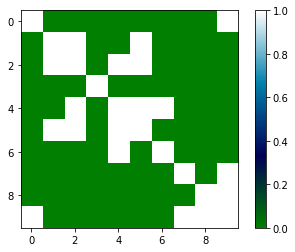

In [89]:
#n : 100
ds = expDatasetSynthetic(P=50,L=10,n_sample=100,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
#print d.inter_matrix

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(d.inter_matrix, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

In [34]:
expEvalHomoScore_tot = []
expEvalPurityScore_tot = []
expEvalNmiScore_tot = []
expEvalEdgeAccuracy_tot = []

#n : 100
ds = expDatasetSynthetic(P=50,L=10,n_sample=100,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
#expEvalEdgeAccuracy_tot.append(evals[4].value)

#n : 300

ds = expDatasetSynthetic(P=50,L=10,n_sample=300,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
#expEvalEdgeAccuracy_tot.append(evals[4].value)

#n : 500

ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
#expEvalEdgeAccuracy_tot.append(evals[4].value)

#n : 800

ds = expDatasetSynthetic(P=50,L=10,n_sample=800,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
#expEvalEdgeAccuracy_tot.append(evals[4].value)

#n : 1000

ds = expDatasetSynthetic(P=50,L=10,n_sample=1000,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
#expEvalEdgeAccuracy_tot.append(evals[4].value)

In [35]:
#100
ds = expDatasetSynthetic(P=50,L=10,n_sample=100,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#300
ds = expDatasetSynthetic(P=50,L=10,n_sample=300,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#500
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#800
ds = expDatasetSynthetic(P=50,L=10,n_sample=800,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#1000
ds = expDatasetSynthetic(P=50,L=10,n_sample=1000,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#kmwans
#100
ds = expDatasetSynthetic(P=50,L=10,n_sample=100,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#300
ds = expDatasetSynthetic(P=50,L=10,n_sample=300,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#500
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.2,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#800
ds = expDatasetSynthetic(P=50,L=10,n_sample=800,inner_density=0.9,inter_density=0.2,beta=.2,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#1000
ds = expDatasetSynthetic(P=50,L=10,n_sample=1000,inner_density=0.9,inter_density=0.2,beta=.2,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

       K-Means     NMFGL  Spectral Cluster
100   0.700972  0.643814          0.183020
300   0.754535  0.725306          0.069342
500   0.889044  0.817187          0.238192
800   0.831188  0.831188          0.319450
1000  0.841619  0.818138          0.301030


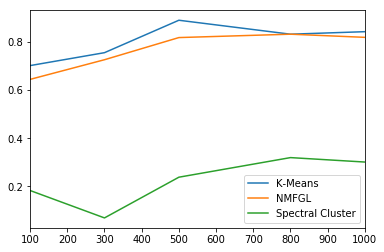

In [78]:
from pandas.core.frame import DataFrame
#expEvalHomoScore_list = np.array(expEvalHomoScore_tot)
expEvalHomoScore_list = {"NMFGL":expEvalHomoScore_tot[0:5],
                        "Spectral Cluster":expEvalHomoScore_tot[5:10],
                        "K-Means":expEvalHomoScore_tot[10:15]}
index = [100,300,500,800,1000]
expEvalHomoScore_table = DataFrame(expEvalHomoScore_list,index=index)
print expEvalHomoScore_table

%matplotlib inline

expEvalHomoScore_table.plot()
#print expEvalHomoScore_tot[12::]

      K-Means  NMFGL  Spectral Cluster
100      0.72   0.66              0.24
300      0.76   0.72              0.16
500      0.86   0.80              0.30
800      0.80   0.80              0.32
1000     0.86   0.84              0.32


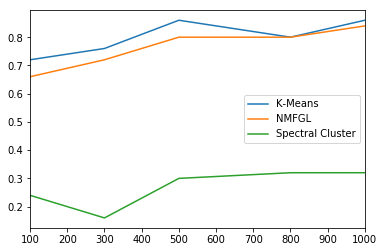

In [77]:
expEvalPurityScore_list = {"NMFGL":expEvalPurityScore_tot[0:5],
                        "Spectral Cluster":expEvalPurityScore_tot[5:10],
                        "K-Means":expEvalPurityScore_tot[10:15]}
index = [100,300,500,800,1000]
expEvalPurityScore_table = DataFrame(expEvalPurityScore_list,index=index)
print expEvalPurityScore_table

%matplotlib inline

expEvalPurityScore_table.plot()
#print expEvalHomoScore_tot[12::]

       K-Means     NMFGL  Spectral Cluster
100   0.705876  0.651095          0.337433
300   0.759426  0.730008          0.194427
500   0.899921  0.822695          0.333819
800   0.839148  0.839148          0.382195
1000  0.845198  0.822342          0.352727


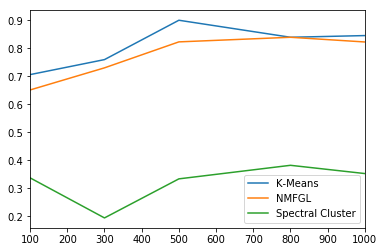

In [80]:
expEvalNmiScore_list = {"NMFGL":expEvalNmiScore_tot[0:5],
                        "Spectral Cluster":expEvalNmiScore_tot[5:10],
                        "K-Means":expEvalNmiScore_tot[10:15]}
index = [100,300,500,800,1000]
expEvalNmiScore_table = DataFrame(expEvalNmiScore_list,index=index)
print expEvalNmiScore_table

%matplotlib inline

expEvalNmiScore_table.plot()

comparison in the case of changing beta

In [81]:
'''comparison of NMFplusGL and simple GL, fix sample size'''
expEvalHomoScore_tot = []
expEvalPurityScore_tot = []
expEvalNmiScore_tot = []
expEvalEdgeAccuracy_tot = []

#NMFGL
#0.1
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.1,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
expEvalEdgeAccuracy_tot.append(evals[4].value[0])

#0.3

ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.3,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
expEvalEdgeAccuracy_tot.append(evals[4].value[0])

#0.5

ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.5,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
expEvalEdgeAccuracy_tot.append(evals[4].value[0])

#beta = 0.7

ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.7,seed=1991)
d = ds.load()
m = NMFplusGL(10,1,0,"kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore(),
         expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest_NMFGL(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])
expEvalEdgeAccuracy_tot.append(evals[4].value[0])

#GL
#beta=0.1
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.1,seed=1991)
d = ds.load()
m = expModelGL(1)
evals = [expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_gl = setting.evaluate()

expEvalEdgeAccuracy_tot.append(evals[1].value[0])

#beta=0.3
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.3,seed=1991)
d = ds.load()
m = expModelGL(1)
evals = [expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_gl = setting.evaluate()

expEvalEdgeAccuracy_tot.append(evals[1].value[0])

#beta =0.5
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.5,seed=1991)
d = ds.load()
m = expModelGL(1)
evals = [expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_gl = setting.evaluate()

expEvalEdgeAccuracy_tot.append(evals[1].value[0])

#beta = 0.7
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.7,seed=1991)
d = ds.load()
m = expModelGL(1)
evals = [expEvalEdgeRecall(),expEvalEdgeAccuracy(),expEvalEdgePrec(),expEvalEdgeF1()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_gl = setting.evaluate()

expEvalEdgeAccuracy_tot.append(evals[1].value[0])

In [82]:
'''comparison of NMFplusGL, kmeans and spetral clustering, fix sample size'''

#Spectral Clustering
#0.1
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.1,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#0.3
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.3,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#0.5
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.5,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#0.7
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.7,seed=1991)
d = ds.load()
m = expModelSpectral(n_groups=10,assign_labels="kmeans",random_state=1991)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#kmeans
#.1
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.1,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#.3
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.3,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#.5
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.5,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

#.7
ds = expDatasetSynthetic(P=50,L=10,n_sample=500,inner_density=0.9,inter_density=0.2,beta=0.7,seed=1991)
d = ds.load()
m = expModelKmeans(10)
evals = [expEvalHomoScore(),expEvalPurityScore(),expEvalNmiScore()]
setting = expSettingTest(n_rounds=1)
setting.setup(ds,m,evals)
result_NMFGL = setting.evaluate()

expEvalHomoScore_tot.append(evals[0].value[0])
expEvalPurityScore_tot.append(evals[1].value[0])
expEvalNmiScore_tot.append(evals[2].value[0])

     Graph Lasso     NMFGL
0.1     0.904490  0.911111
0.3     0.865306  0.711111
0.5     0.831020  0.511111
0.7     0.792653  0.311111


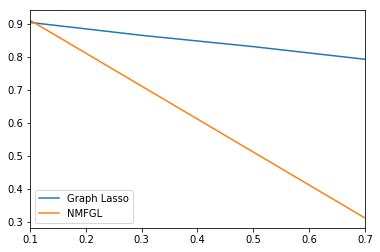

In [85]:
expEvalEdgeAccuracy_list = {"NMFGL":expEvalEdgeAccuracy_tot[0:4],
                        "Graph Lasso":expEvalEdgeAccuracy_tot[4:8]}
index = [0.1,0.3,0.5,0.7]
expEvalEdgeAccuracy_table = DataFrame(expEvalEdgeAccuracy_list,index=index)
print expEvalEdgeAccuracy_table

%matplotlib inline

expEvalEdgeAccuracy_table.plot()

      K-Means     NMFGL  Spectral Cluster
0.1  0.904621  0.904621          0.281826
0.3  0.828527  0.735850          0.296540
0.5  0.730957  0.644822          0.318306
0.7  0.662010  0.637814          0.236255


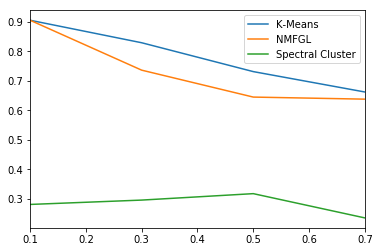

In [86]:
expEvalHomoScore_list = {"NMFGL":expEvalHomoScore_tot[0:4],
                        "Spectral Cluster":expEvalHomoScore_tot[4:8],
                        "K-Means":expEvalHomoScore_tot[8:12]}
index = [0.1,0.3,0.5,0.7]
expEvalHomoScore_table = DataFrame(expEvalHomoScore_list,index=index)
print expEvalHomoScore_table

%matplotlib inline

expEvalHomoScore_table.plot()

     K-Means  NMFGL  Spectral Cluster
0.1     0.92   0.92              0.36
0.3     0.82   0.70              0.32
0.5     0.74   0.64              0.36
0.7     0.66   0.62              0.28


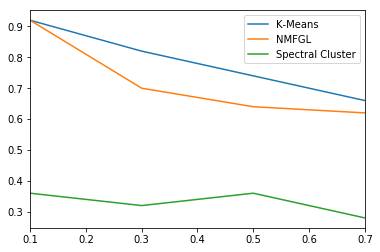

In [87]:
expEvalPurityScore_list = {"NMFGL":expEvalPurityScore_tot[0:4],
                        "Spectral Cluster":expEvalPurityScore_tot[4:8],
                        "K-Means":expEvalPurityScore_tot[8:12]}
index = [0.1,0.3,0.5,0.7]
expEvalPurityScore_table = DataFrame(expEvalPurityScore_list,index=index)
print expEvalPurityScore_table

%matplotlib inline

expEvalPurityScore_table.plot()

      K-Means     NMFGL  Spectral Cluster
0.1  0.909475  0.909475          0.383045
0.3  0.839483  0.750406          0.369945
0.5  0.739488  0.660971          0.361604
0.7  0.668946  0.642847          0.309620


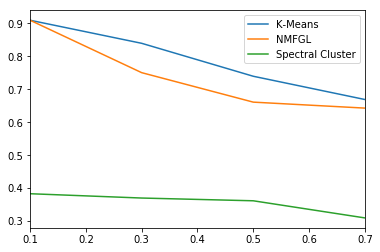

In [88]:
expEvalNmiScore_list = {"NMFGL":expEvalNmiScore_tot[0:4],
                        "Spectral Cluster":expEvalNmiScore_tot[4:8],
                        "K-Means":expEvalNmiScore_tot[8:12]}
index = [0.1,0.3,0.5,0.7]
expEvalNmiScore_table = DataFrame(expEvalNmiScore_list,index=index)
print expEvalNmiScore_table

%matplotlib inline

expEvalNmiScore_table.plot()

### Problem 3: The Hacking Part  (20 points)


* Data Collection
* Implement a small Demo/Prototype/experiment result figures for the "product" of your data science company. You could use this demo during the Pitch

In [10]:
# your code here
import pandas as pd
from NMFGL import NMFplusGL,transfer_emp
import numpy as np
from expDataset import expDatasetSynthetic
#from sklearn.pipeline import Pipeline
#from sklearn.model_selection import GridSearchCV

df = pd.read_csv('train_1.csv')
m = pd.read_csv('train.csv')
M = np.array(m.dropna())#filter NA
print df,M.shape

                                                     Page  2015-07-01  \
0                 2NE1_zh.wikipedia.org_all-access_spider        18.0   
1                  2PM_zh.wikipedia.org_all-access_spider        11.0   
2                   3C_zh.wikipedia.org_all-access_spider         1.0   
3              4minute_zh.wikipedia.org_all-access_spider        35.0   
4       52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN   
5                 5566_zh.wikipedia.org_all-access_spider        12.0   
6               91Days_zh.wikipedia.org_all-access_spider         NaN   
7                A'N'D_zh.wikipedia.org_all-access_spider       118.0   
8                AKB48_zh.wikipedia.org_all-access_spider         5.0   
9                ASCII_zh.wikipedia.org_all-access_spider         6.0   
10               ASTRO_zh.wikipedia.org_all-access_spider         NaN   
11      Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...         2.0   
12      All_your_base_are_belong_to_us_zh.wikipedia

In [11]:
m = NMFplusGL(10,0.1,0,"kmeans",random_state=1991)
output = m.predict(M)
print output

[array([6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 7, 6, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 6, 6, 6, 0, 0, 0, 6, 6, 0, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 6, 2, 6, 2, 2, 6,
       0, 6, 6, 6, 6, 6, 6, 6, 0, 2, 2, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 6,
       2, 6, 6, 6, 0, 6, 6, 6, 6, 6, 6, 0, 6, 6, 2, 6, 6, 6, 0, 6, 6, 2, 6,
       0, 0, 0, 0, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 6, 6, 0, 6, 0, 6, 6, 6, 6, 6, 6, 0, 0,
       0, 2, 6, 6, 0, 0, 0, 6, 2, 6, 6, 6, 0, 6, 6, 2, 2, 0, 0, 0, 0, 6, 2,
       2, 2, 6, 0, 0, 6, 2, 6, 6, 6, 6, 6, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6,
       0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 6, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0,
       2, 6

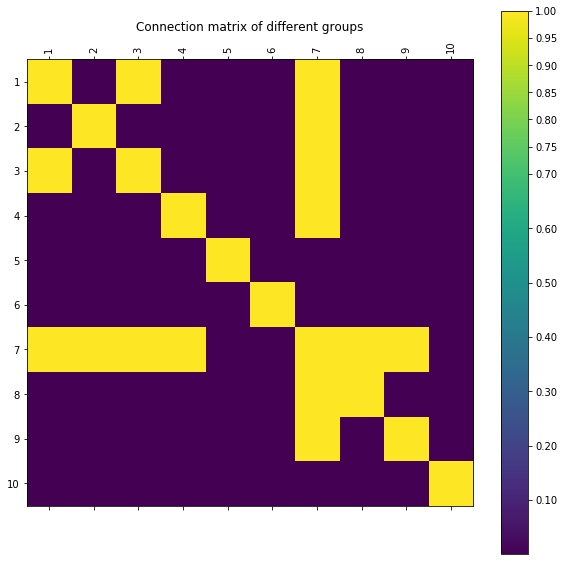

In [14]:
import matplotlib.pyplot as plt

threshold = 0
est_edges = (abs(output[1])>threshold).astype(int)

labels = [1,2,3,4,5,6,7,8,9,10]

fig,ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(est_edges,interpolation='nearest')
ax.grid(False)
plt.xticks(range(0,10),labels,rotation=90)
plt.yticks(range(0,10),labels)
plt.title('Connection matrix of different groups')
fig.colorbar(cax,ticks=[.1,.2,.3,.4,.5,.6,.7,.75,.8,.85,.9,.95,1])
plt.show()

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 4 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **